In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'no-latex'])

# Definimos nuestra función, que ajusta los pesos dado el grado del polinomio

In [4]:
#Función para calcular los pesos según el grado
def cost_train_data(x, y, n= 1):
    
    xv = x[:, np.newaxis] 
    datax = [xv**(i) for i in range(n+1)]
    X = np.hstack(datax)
    t = y[:, np.newaxis]
    #Implementamos en forma matricial, el calculo de los pesos
    w = np.linalg.inv(X.T @ X) @ X.T @ t
    
    cost = np.mean((X @ w - y)**2)
 
    return cost

data = np.loadtxt('../Data/olympic100m_men.txt', delimiter=',').T

x = data[0]
y = data[1]

Text(0.5, 1.0, 'Total Cost vs Degree')

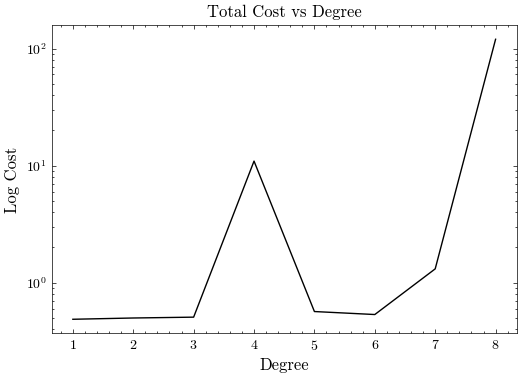

In [11]:
degree = 8
costes = [cost_train_data(x, y, i) for i in range(1, degree+1)]
degrees = np.arange(1,degree+1)

fig = plt.figure(figsize=(6, 4))
plt.plot(degrees, costes, 'k')
plt.yscale('log')
plt.xlabel('Degree', fontsize= 12)
plt.ylabel('Log Cost', fontsize= 12);
plt.title('Total Cost vs Degree')


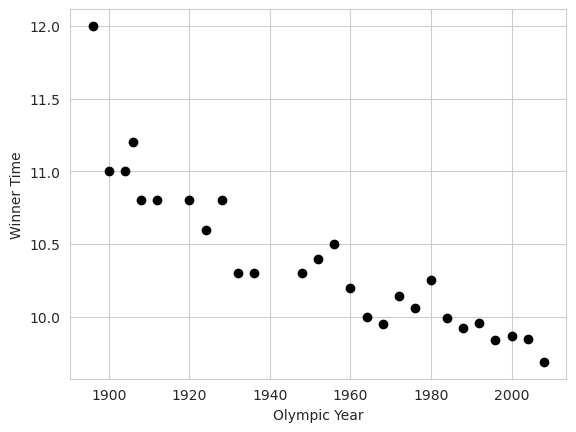

In [48]:
plt.scatter(x, y, color='black')
plt.xlabel('Olympic Year')
plt.ylabel('Winner Time');

In [122]:
#Función de polinomio dando sus coefficientes
def poly(coeficients, x):
    
    d = len(coeficients)
    y = 0
    
    for j in range(d):
        y += coeficients[j]*x**(j)
        
    return y